# K nearest neighbors classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris  

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targte,target,flower_name
0,5.1,3.5,1.4,0.2,0,0,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa


In [19]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targte,target,flower_name
50,7.0,3.2,4.7,1.4,1,1,versicolor
51,6.4,3.2,4.5,1.5,1,1,versicolor
52,6.9,3.1,4.9,1.5,1,1,versicolor
53,5.5,2.3,4.0,1.3,1,1,versicolor
54,6.5,2.8,4.6,1.5,1,1,versicolor


In [20]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targte,target,flower_name
100,6.3,3.3,6.0,2.5,2,2,virginica
101,5.8,2.7,5.1,1.9,2,2,virginica
102,7.1,3.0,5.9,2.1,2,2,virginica
103,6.3,2.9,5.6,1.8,2,2,virginica
104,6.5,3.0,5.8,2.2,2,2,virginica


In [21]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targte,target,flower_name
0,5.1,3.5,1.4,0.2,0,0,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa


In [33]:
df = df.drop(['targte'], axis='columns')

In [34]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [35]:
%matplotlib inline 

# Sepal length Vs Sepal Width

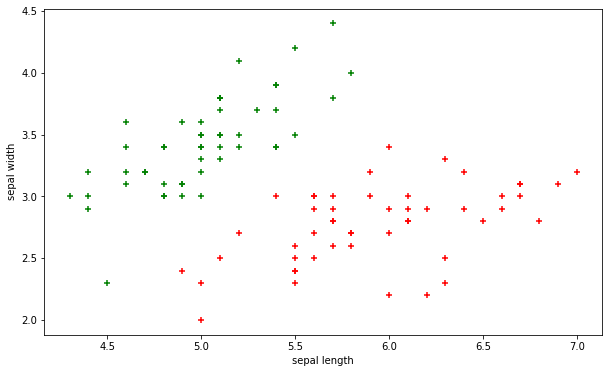

In [36]:

plt.figure(figsize=(10,6))
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', marker='+')

# Petal length vs Pepal Width (Setosa vs Versicolor)

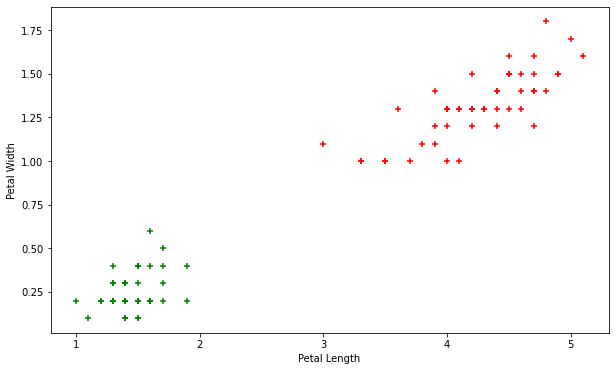

In [37]:
plt.figure(figsize=(10,6))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="red",marker='+')

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [45]:
len(X_train)

120

In [46]:
len(X_test)

30

In [47]:
len(y_train)

120

In [48]:
len(y_test)

30

# Create KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
knn.score(X_test, y_test)

0.9666666666666667

In [59]:
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

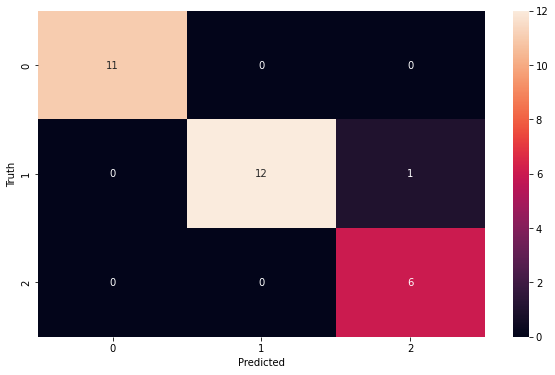

In [60]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test, y_predicted)